In [1]:
import os
import re
import subprocess

import numpy as np

from astropy import modeling, time

%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
# the path to the astropy source code
astropy_path = os.path.join(os.environ['HOME'], 'src', 'astropy')

First we record the date and SHA of the latest commit to know when this NB applies:

In [3]:
res = subprocess.run('git log -1 --format="%cd\n%H" HEAD', shell=True, cwd=astropy_path, check=True, stdout=subprocess.PIPE)
print(res.stdout.decode().strip())

Sun Oct 22 15:25:19 2017 -0400
566f82399e1e31a271ba88e41546c8759fc388b1


In [4]:
res = subprocess.run('git shortlog HEAD', shell=True, cwd=astropy_path, stdout=subprocess.PIPE)
output = res.stdout.decode()

In [5]:
name_commits = []
for line in output.split('\n'):
    match = re.match(r'(.*)\((\d+)\):', line)
    if match:
        name_commits.append((match.group(1).strip(), int(match.group(2))))
name_commit_map = dict(name_commits)    

In [6]:
ncommits = np.fromiter(name_commit_map.values(), dtype=int)

In [7]:
ns, edges = np.histogram(np.log10(ncommits),bins=15)
lns = np.log10(ns)
bincens = (edges[1:] + edges[:-1])/2

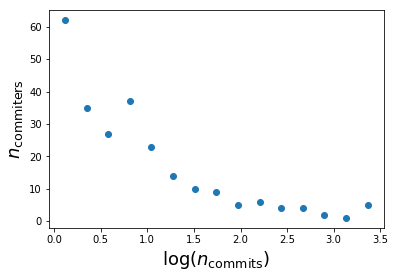

In [8]:
plt.scatter(bincens, ns)
plt.xlabel(r'$\log(n_{\rm commits})$', fontsize=18)
plt.ylabel(r'$n_{\rm commiters}$', fontsize=18)

<Linear1D(slope=-0.45783104458769275, intercept=1.7621816037292395)>

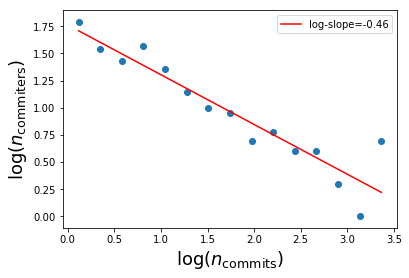

In [9]:
lm = modeling.models.Linear1D()
fitmod = modeling.fitting.LinearLSQFitter()(lm, bincens, lns)

plt.scatter(bincens, lns)
plt.plot(bincens, fitmod(bincens), c='r', label="log-slope={:.2f}".format(fitmod.slope.value))
plt.xlabel(r'$\log(n_{\rm commits})$', fontsize=18)
plt.ylabel(r'$\log(n_{\rm commiters})$', fontsize=18)
plt.legend()

fitmod

Seems to be a fairly good power-law slope... Zipf's law of random human stuff following power laws seems to hold?